# Data 102 Project: EDA

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("/Users/genielee/Downloads/Region_Mobility_Report_CSVs/2022_US_Region_Mobility_Report.csv")

In [35]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-01-01,-43.0,-33.0,-26.0,-41.0,-44.0,12.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-01-02,-20.0,-12.0,-26.0,-22.0,-17.0,7.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-01-03,-14.0,-1.0,-24.0,-32.0,-38.0,13.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-01-04,-14.0,1.0,-19.0,-30.0,-30.0,11.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2022-01-05,-16.0,0.0,-19.0,-32.0,-28.0,10.0


In [39]:
king_df = df[(df["sub_region_1"] == "Washington") 
             & (df["sub_region_2"] =="King County")].iloc[:, 8:15]
king_df

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
704562,2022-01-01,-54.0,-41.0,-34.0,-38.0,-45.0,12.0
704563,2022-01-02,-27.0,-25.0,-56.0,-25.0,-16.0,9.0
704564,2022-01-03,-26.0,-10.0,-43.0,-48.0,-56.0,19.0
704565,2022-01-04,-28.0,-10.0,-27.0,-46.0,-50.0,19.0
704566,2022-01-05,-29.0,-10.0,-25.0,-48.0,-49.0,18.0
...,...,...,...,...,...,...,...
704845,2022-10-11,-18.0,-10.0,24.0,-29.0,-40.0,9.0
704846,2022-10-12,-19.0,-10.0,23.0,-33.0,-41.0,9.0
704847,2022-10-13,-21.0,-10.0,10.0,-30.0,-41.0,9.0
704848,2022-10-14,-18.0,-9.0,16.0,-29.0,-44.0,9.0


In [63]:
gas_prices = pd.read_csv("/Users/genielee/Downloads/Weekly_Seattle_WA_All_Grades_All_Formulations_Retail_Gasoline_Prices_Modified.csv")
# use iloc to match length of gas_prices with length of king_df
gas_prices = gas_prices.iloc[1: , :]

In [40]:
# add days for king_df
days = []
for i in range(len(king_df)):
    if i % 7 == 0:
        days.append("Saturday")
    elif i % 7 == 1:
        days.append("Sunday")
    elif i % 7 == 2:
        days.append("Monday")
    elif i % 7 == 3:
        days.append("Tuesday")
    elif i % 7 == 4:
        days.append("Wednesday")
    elif i % 7 == 5:
        days.append("Thursday")
    elif i % 7 == 6:
        days.append("Friday")
king_df["Day"] = days

In [64]:
# match number of rows from king_df to gas_prices (Mondays only)
king_df = king_df[king_df["Day"] == "Monday"]
king_df = king_df.sort_values(by = ["date"], ascending = False)

In [65]:
gas_prices["date"] = king_df["date"].values

In [66]:
merged_df = pd.merge(gas_prices, king_df, left_on = "date", right_on = "date")
merged_df.drop(columns = ["Date"])

,Fuel_Price,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Day
0,5.598,2022-10-10,-21.0,-11.0,2.0,-31.0,-44.0,10.0,Monday
1,5.458,2022-10-03,-17.0,-9.0,9.0,-28.0,-42.0,9.0,Monday
2,4.967,2022-09-26,-19.0,-9.0,16.0,-28.0,-44.0,9.0,Monday
3,4.758,2022-09-19,-19.0,-9.0,16.0,-27.0,-45.0,9.0,Monday
4,4.776,2022-09-12,-13.0,-9.0,14.0,-23.0,-45.0,9.0,Monday
5,4.741,2022-09-05,-15.0,-5.0,66.0,-36.0,-79.0,14.0,Monday
6,4.841,2022-08-29,-16.0,-8.0,31.0,-30.0,-48.0,10.0,Monday
7,4.883,2022-08-22,-15.0,-8.0,36.0,-27.0,-48.0,11.0,Monday
8,4.908,2022-08-15,-15.0,-7.0,37.0,-28.0,-48.0,11.0,Monday
9,4.983,2022-08-08,-14.0,-7.0,45.0,-28.0,-48.0,9.0,Monday


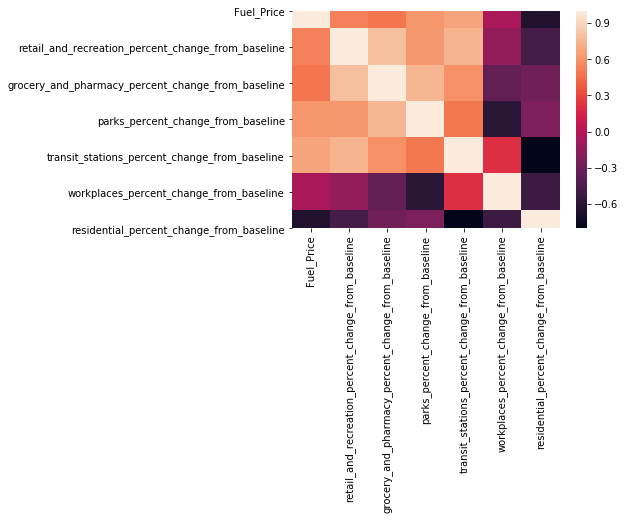

In [67]:
dataplot = sns.heatmap(merged_df.corr())

In [ ]:
k